In [1]:
import os
import PyPDF2
import fitz
import pandas as pd

In [2]:
from nltk import tokenize
# import nltk
# nltk.download('punkt')

In [3]:
dir = 'annoted_sustainability_reports/Materials'
 

### Extracting Sentences

In [4]:
# aggregated sentences per report
highlighted_num = []
highlighted_sentences = [] 
all_sentences = []
highlighted_label = []
all_label = []

# aggregated sentences of the entire industry (tokenizing highlighted_result & all_result)
rel_text = []
rel_label = []
all_text_final = []

x_label = ["Linde", "Ecolab", "SherwinWilliams", "IntrntlFlavorsandFragrances", "FreeportMcmoran", "Nucor", 
     "AirProducts", "Corteva", "NewmontMining", "Dow"]

for file in os.listdir(dir): # running all the files in the industry folder
    f = os.path.join(dir, file) # joining filename and directory
    print(f)
    
    # labelling sentences by companies 
    res = list(filter(lambda x:  x in f, x_label))

    doc = fitz.open(f) # opening each company report
    print(doc)
    
    # results of each report
    highlighted_result = []
    all_result = [] 
    
    # Iterate each page of the document 
    for page in doc:
        
        # extract all the sentences in pdf 
        test = page.get_text()
        all_result.append(test)
        
        # extracting highlighted sentences from pdf 
        highlights = []
        annot = page.first_annot
        
        while annot:
            if annot.type[0] == 8:
                all_coordinates = annot.vertices
                try:
                    if len(all_coordinates) == 4:
                        highlight_coord = fitz.Quad(all_coordinates).rect
                        highlights.append(highlight_coord)
                    else:
                        all_coordinates = [all_coordinates[x:x+4] for x in range(0, len(all_coordinates), 4)]
                        for i in range(0,len(all_coordinates)):
                            coord = fitz.Quad(all_coordinates[i]).rect
                            highlights.append(coord)
                except:
                    print("NoneType found")
            annot = annot.next
        
        # calculate coordinate sum to eliminate duplicated sentences 
        coordinate_sum_total = []
        all_words = page.get_text_words()
        highlight_text = []
        if len(highlights) > 0:
            for h in highlights:
                sentence = []
                num_i = 0
                for w in all_words:
                    if (fitz.Rect(w[0:4]).intersects(h)):
                        if str(sum(w[0:4])) not in coordinate_sum_total: #if no duplicate coordinate sum found, append
                            coordinate_sum_total.append(str(sum(w[0:4])))
                            sentence.append(w[4])
            
                highlight_text.append(" ".join(sentence))
        
#         print(highlight_text)
        
        if len(highlight_text) > 0:
            highlighted_result.append(" ".join(highlight_text))
        
#         print(result)

    # Results of the entire industry & keeps track of number of sentences in highlighted_num
    highlighted_num.append(len(highlighted_result))
    highlighted_sentences.append(highlighted_result)
    all_sentences.append(all_result)
    
    print(len(highlighted_result))
    
#         print(test_text)
        
    for r in highlighted_result:
        if r is not None:
            # tokenize sentences by pages where the sentences is found 
            # instead of conducting it to the entire report this enhances accuracy 
            rel_text += tokenize.sent_tokenize(r)
            highlighted_label.append(res)
            rel_label += res * len(tokenize.sent_tokenize(r))         
    
    for i in all_result:
        all_text_final += tokenize.sent_tokenize(i.replace("\n", " "))
        all_label += res * len(tokenize.sent_tokenize(i.replace("\n", " ")))
        
#     print(highlighted_sentences, "\n", len(highlighted_sentences))



annoted_sustainability_reports/Materials/Linde_2020_sustainability_report.pdf
Document('annoted_sustainability_reports/Materials/Linde_2020_sustainability_report.pdf')
9
annoted_sustainability_reports/Materials/Ecolab_2021 _CSR_report.pdf
Document('annoted_sustainability_reports/Materials/Ecolab_2021 _CSR_report.pdf')
5
annoted_sustainability_reports/Materials/SherwinWilliams_2021_Sustainability_Report.pdf
Document('annoted_sustainability_reports/Materials/SherwinWilliams_2021_Sustainability_Report.pdf')
2
annoted_sustainability_reports/Materials/IntrntlFlavorsandFragrances_2021_ESG_report.pdf
Document('annoted_sustainability_reports/Materials/IntrntlFlavorsandFragrances_2021_ESG_report.pdf')
2
annoted_sustainability_reports/Materials/FreeportMcmoran_2021_sustainability_report.pdf
Document('annoted_sustainability_reports/Materials/FreeportMcmoran_2021_sustainability_report.pdf')
5
annoted_sustainability_reports/Materials/Nucor_2021_Sustainability_Report.pdf
Document('annoted_sustainabi

In [5]:
highlighted_num

[9, 5, 2, 2, 5, 2, 5, 0, 6, 4]

In [6]:
rel_text_df = pd.DataFrame([rel_text, rel_label]).transpose()
rel_text_df = rel_text_df.rename(columns = {0: 'relevant_sentences', 1: 'company_label'})
rel_text_df

,relevant_sentences,company_label
0,"productivity, energy use and GHG In fact, we c...",Linde
1,"in 2020, Linde gases, principally oxygen custo...",Linde
2,See page 14.,Linde
3,accelerate.,Linde
4,New Green fuels hydrogen usage technologies wi...,Linde
...,...,...
80,"By 2050, Dow intends to be carbon neutral (Sco...",Dow
81,"In 2021, we expanded access to renewable power...",Dow
82,"In 2021, Dow’s Scope 2 emissions were reduced ...",Dow
83,"In 2021, we implemented sourcing of cleaner po...",Dow


In [7]:
all_text_final_df = pd.DataFrame([all_text_final, all_label]).transpose()
all_text_final_df = all_text_final_df.rename(columns = {0: 'all_sentences', 1: 'company_label'})
all_text_final_df

,all_sentences,company_label
0,Making our world more productive Sustainable D...,Linde
1,2 Linde 2020 Sustainable Development Report,Linde
2,3 Linde 2020 Sustainable Development Report Fo...,Linde
3,These forward-looking statements are identifi...,Linde
4,They are based on management’s reasonable expe...,Linde
...,...,...
13184,There may be other risks and uncertainties tha...,Dow
13185,If any of those risks or uncertainties develop...,Dow
13186,Dow assumes no obligation to update or revise ...,Dow
13187,®™ Trademark of The Dow Chemical Company (“Dow...,Dow


### Getting Sentence Statistics 

In [8]:
# count rel sentences 
rel_count = rel_text_df.groupby('company_label', sort = False).count()

# count all sentences
sent_count = all_text_final_df.groupby('company_label', sort = False).count()

In [9]:
sentences_list = []
rel_sent_list = []

final_text_stat = pd.concat([sent_count, rel_count],  sort = False, axis = 1)

[rel_sent_list.append(rel_sent) for rel_sent in final_text_stat['relevant_sentences']]    
[sentences_list.append(all_sent) for all_sent in final_text_stat['all_sentences']]    
    
final_text_stat['relevant_sentences'] = final_text_stat['relevant_sentences'].fillna(0)
final_text_stat['percentages'] = final_text_stat['relevant_sentences'] / final_text_stat['all_sentences'] * 100
final_text_stat

,all_sentences,relevant_sentences,percentages
company_label,,,
Linde,2252,32.0,1.420959
Ecolab,1393,10.0,0.717875
SherwinWilliams,993,2.0,0.201410
IntrntlFlavorsandFragrances,1862,2.0,0.107411
FreeportMcmoran,830,8.0,0.963855
Nucor,568,4.0,0.704225
AirProducts,818,8.0,0.977995
Corteva,830,0.0,0.000000
NewmontMining,658,12.0,1.823708


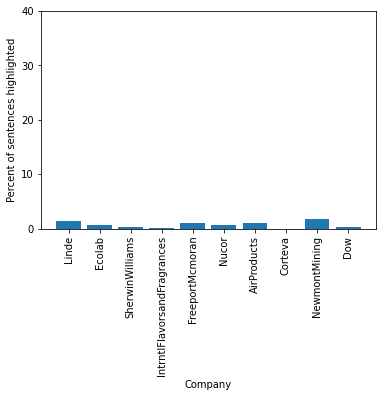

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import glob
y = []

x = ["Linde", "Ecolab", "SherwinWilliams", "IntrntlFlavorsandFragrances", "FreeportMcmoran", "Nucor", 
     "AirProducts", "Corteva", "NewmontMining", "Dow"]

i = 0

for file in os.listdir(dir):
    y.append(100 * (rel_sent_list[i])/sentences_list[i])
    i = i+1

plt.bar(x, y, width = 0.8)
plt.xticks(rotation='vertical')
plt.xlabel("Company")
plt.ylabel("Percent of sentences highlighted")
plt.yticks(np.arange(0, 50, 10))
plt.show()

In [11]:
import pandas as pd

series = pd.Series(y)
series.describe()

count    9.000000
mean     0.794661
std      0.577228
min      0.107411
25%      0.234506
50%      0.717875
75%      0.977995
max      1.823708
dtype: float64

### Exporting and Saving Files 

In [12]:
#storing variable so they can be called between notebooks (for aggregate analysis, test/train data sets, and modeling later on)

Materials_reltext = rel_text_df
Materials_alltext = all_text_final_df
Materials_stat = final_text_stat


%store Materials_reltext
%store Materials_alltext
%store Materials_stat

Stored 'Materials_reltext' (DataFrame)
Stored 'Materials_alltext' (DataFrame)
Stored 'Materials_stat' (DataFrame)
